# Credit Card Clustering using Scikit-Learn
---  ------                       --------------   -----  
In this notebook, we would like to cluster credit card customer using Scikit-Learn

# Problem Statement
---  ------                       --------------   -----  
The existence of credit cards has been known for a long time, but the current model of financial transactions makes credit cards much more useful and convenient. But what exactly is a credit card? In simple terms, a credit card is defined as a means of payment in the form of a card whose payment costs in a financial transaction are borne in advance by the card issuer. After that, the credit card holder must pay off the card payment debt on the time agreed beforehand. Credit cards are different from customer debit cards, so credit cards can offer unique benefits to the people who use them. However, in many ways, credit cards are no different from debit cards. The difference is only in the capital used. Credit card funds are outstanding balances that are limited to a certain amount.

Credit card holders will be charged a certain fee for using the credit card. An annual fee is charged to credit card users according to the facilities provided by the bank. In many cases, the first year's annual fee is often waived for the added benefit of the credit card user. In addition, there are late fees and interest. A late payment fee is charged if the cardholder is late paying the bill. During this period, interest will be charged if the customer uses the card for credit or installment payments. If the customer exceeds his credit card limit, the customer will also be charged.

In addition to these fees, there are additional fees for some of the services offered by credit cards, such as cash withdrawal fees and payment information. Cash withdrawal fees are usually charged if you use a credit card to withdraw funds. Meanwhile, a payment information fee will be charged if the customer requires detailed and complete payment information. If possible, choose a credit card without a monthly fee to make it lighter.

# Data Source
Kaggle : Credit Card Dataset for Clustering ( https://www.kaggle.com/datasets/arjunbhasin2013/ccdata )

# Data Attributes
Total : 8950 observation × 18 variables

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

# Objective:
---  ------                       --------------   -----  
    1. Get a good dataset with clear variables
    2. Get complete and easy-to-understand informationTo understand the dataset
    3. Get a clear partition of data for modeling
    4. Get a good K-Means and PCA Scikit-Learn model
    5. To cluster credit card customer using Scikit-Learn

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import warnings   
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

# Import File

In [2]:
df = pd.read_csv('C:/Users/W I N D O W S/Downloads/Hacktiv8 2022/PROJECT/Project 4/CC GENERAL.csv')
pd.set_option('display.max_columns', None)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Cleansing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Checking Null values

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

It can be seen that there are 2 variables that have a null value

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Fix Null Value

To overcome the null values ​​for the two variables, the null values ​​will be replaced with the average value

In [6]:
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

The 'CUST_ID' variable is not required in the on-goal analysis

In [7]:
df= df.drop(["CUST_ID"], 1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
num_coloumn = df.select_dtypes(float).columns.to_list()
num_coloumn

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

In [9]:
num = df.select_dtypes(float).columns.tolist()
for column in df[num]:
    print(f'{column} : {df[column].unique()}')
    print()

BALANCE : [  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]

BALANCE_FREQUENCY : [0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]

PURCHASES : [  95.4     0.    773.17 ...  291.12  144.4  1093.25]

ONEOFF_PURCHASES : [   0.    773.17 1499.   ...  734.4  1012.73 1093.25]

INSTALLMENTS_PURCHASES : [  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]

CASH_ADVANCE : [   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]

PURCHASES_FREQUENCY : [0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667 0.916667 0.583333 0.375    0.625    0.272727 0.833333
 0.909091 0.111111 0.142

It can be seen that there are no unreasonable values

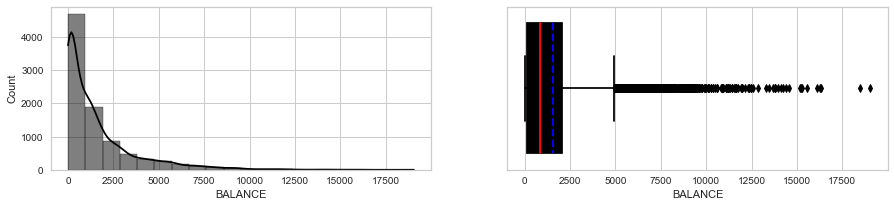

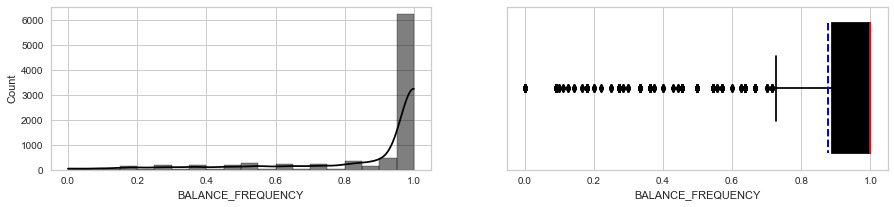

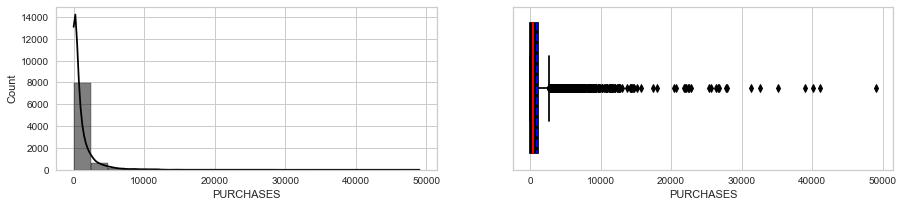

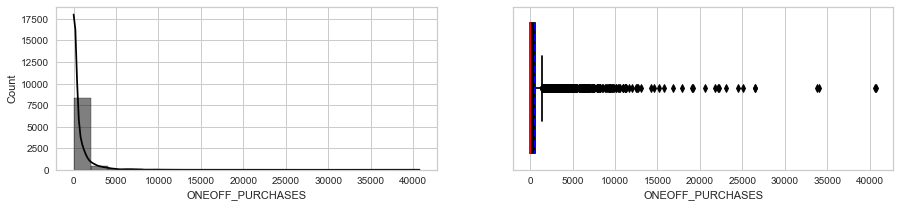

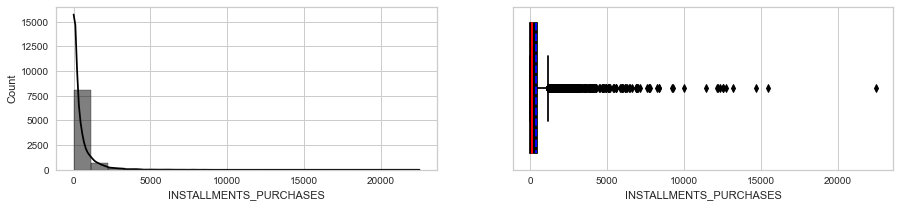

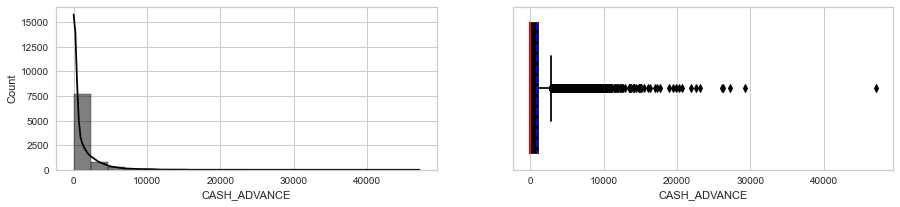

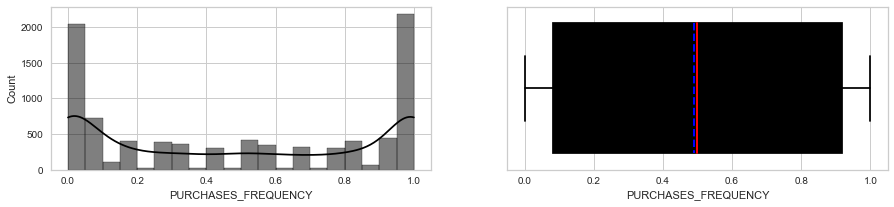

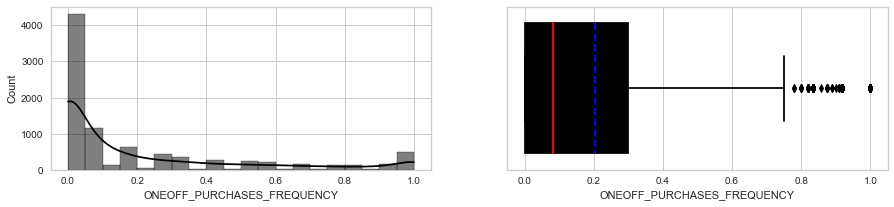

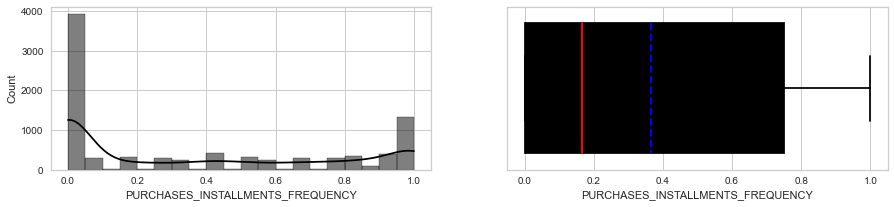

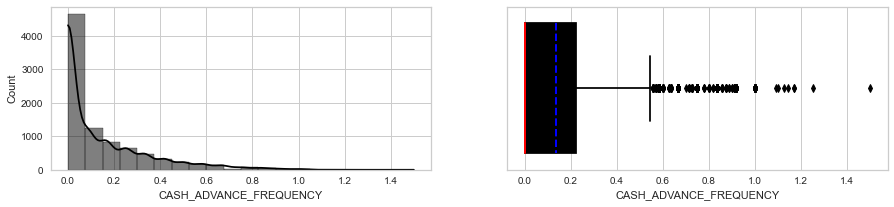

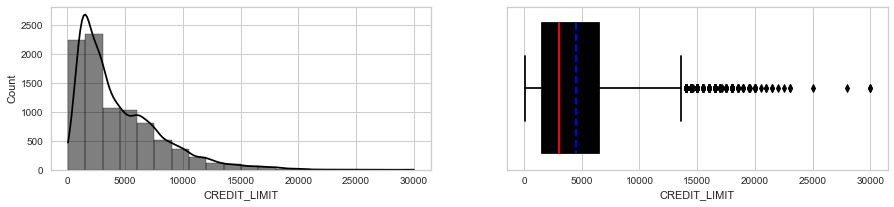

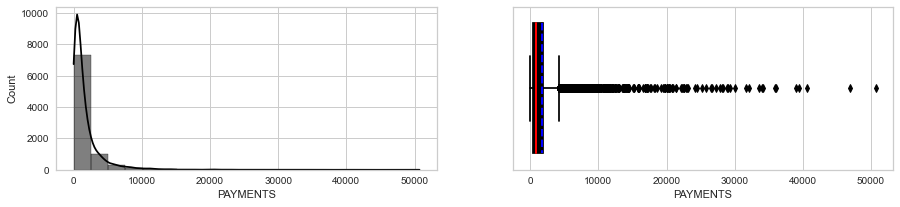

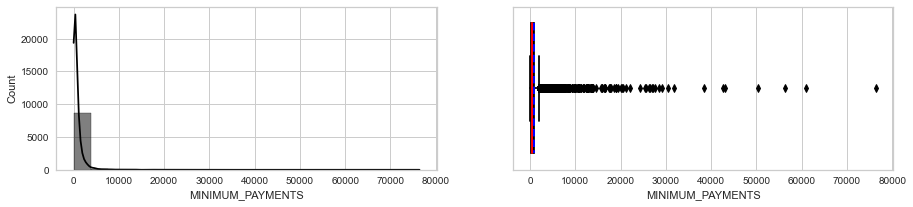

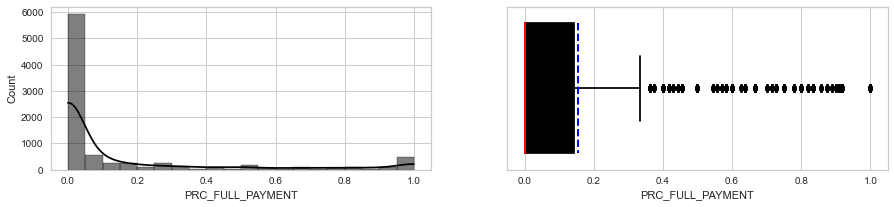

In [10]:
for i in num_coloumn:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    sns.histplot(df[i],bins=20, kde=True,ax=axs[0], color = 'black');
    sns.boxplot(df[i], ax = axs[1], color='black',
          showmeans = True,
          meanline = True,
          medianprops = {'linewidth':2, 'color':'red'},
          meanprops = {'linewidth':2, 'color':'blue'})

Furthermore, overcoming outliers, because clustering is very sensitive to clustering

In [11]:
df.iloc[:,:-1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [12]:
for i in df.iloc[:,:-1]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3- Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim

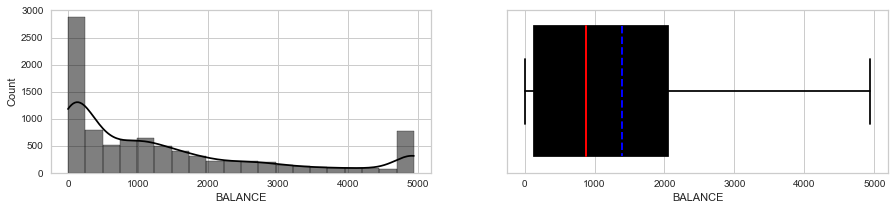

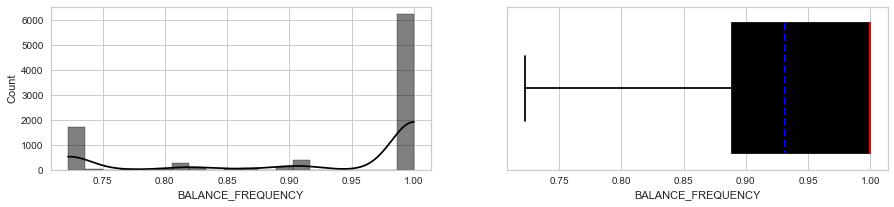

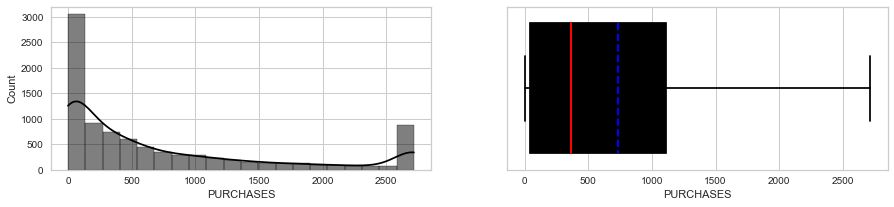

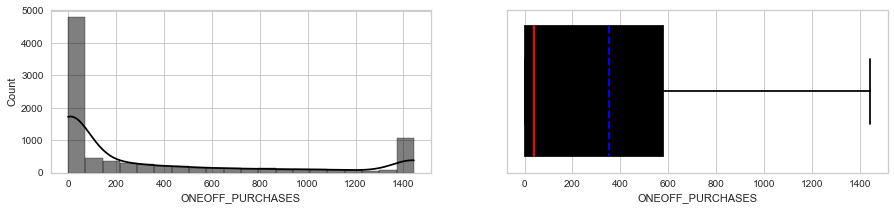

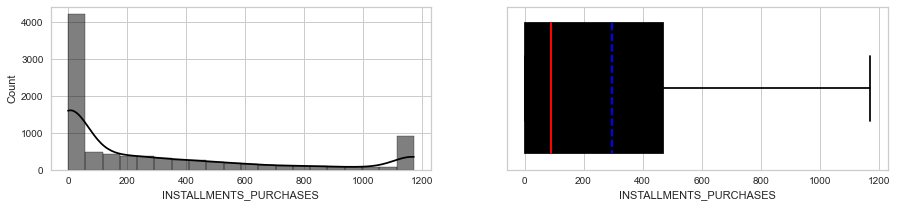

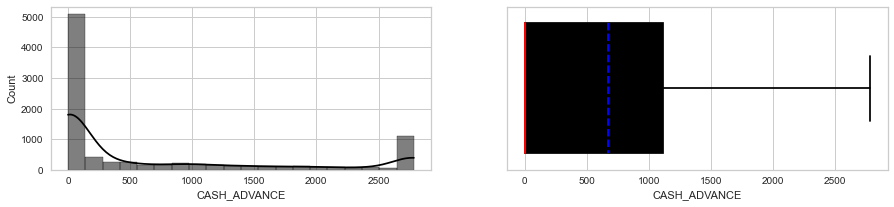

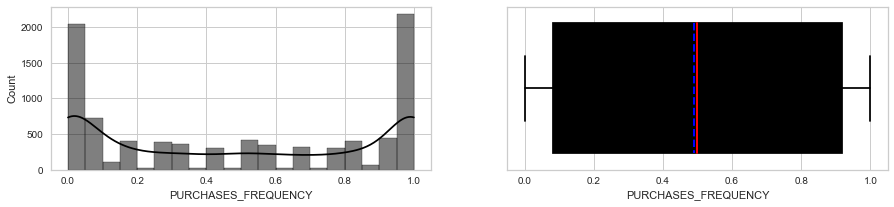

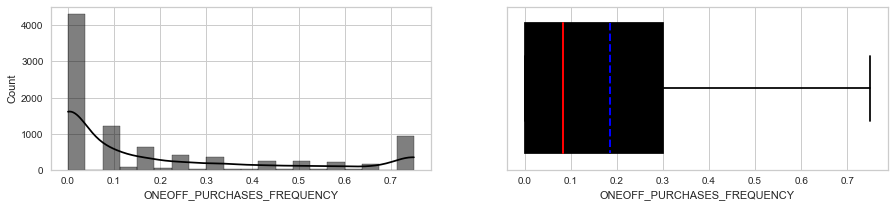

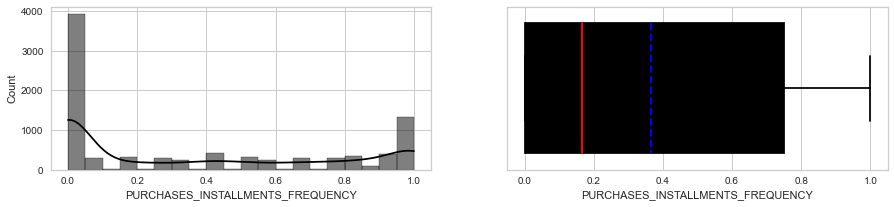

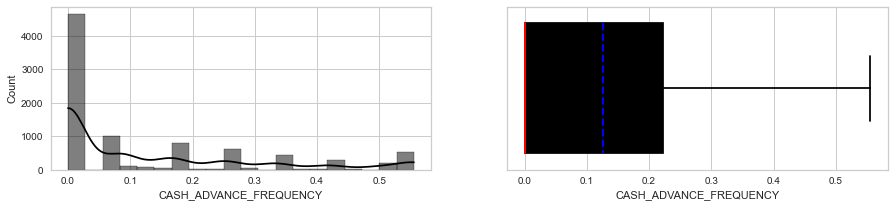

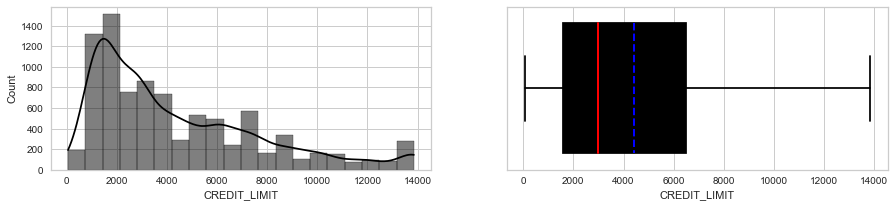

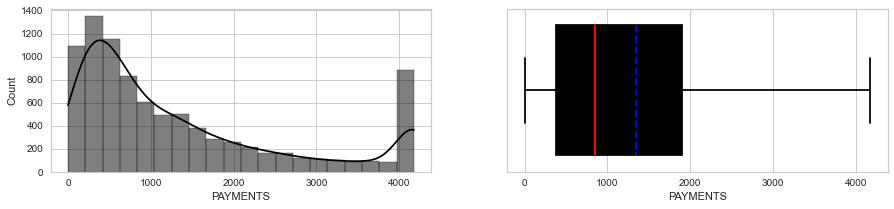

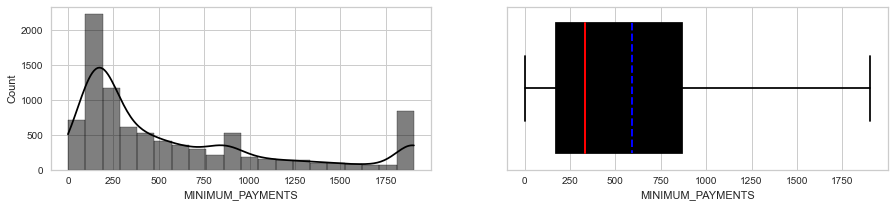

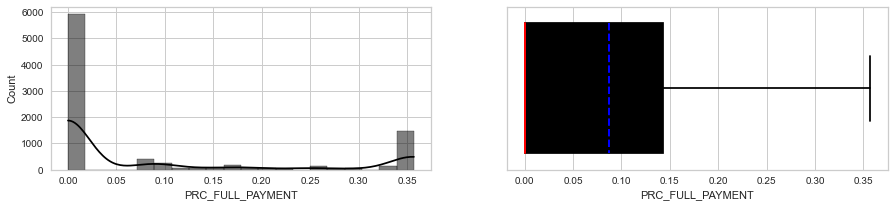

In [13]:
for i in num_coloumn:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    sns.histplot(df[i],bins=20, kde=True,ax=axs[0], color = 'black');
    sns.boxplot(df[i], ax = axs[1], color='black',
          showmeans = True,
          meanline = True,
          medianprops = {'linewidth':2, 'color':'red'},
          meanprops = {'linewidth':2, 'color':'blue'})

In [14]:
df_new = df

# Prepocessing

## Correlation Data

<AxesSubplot:>

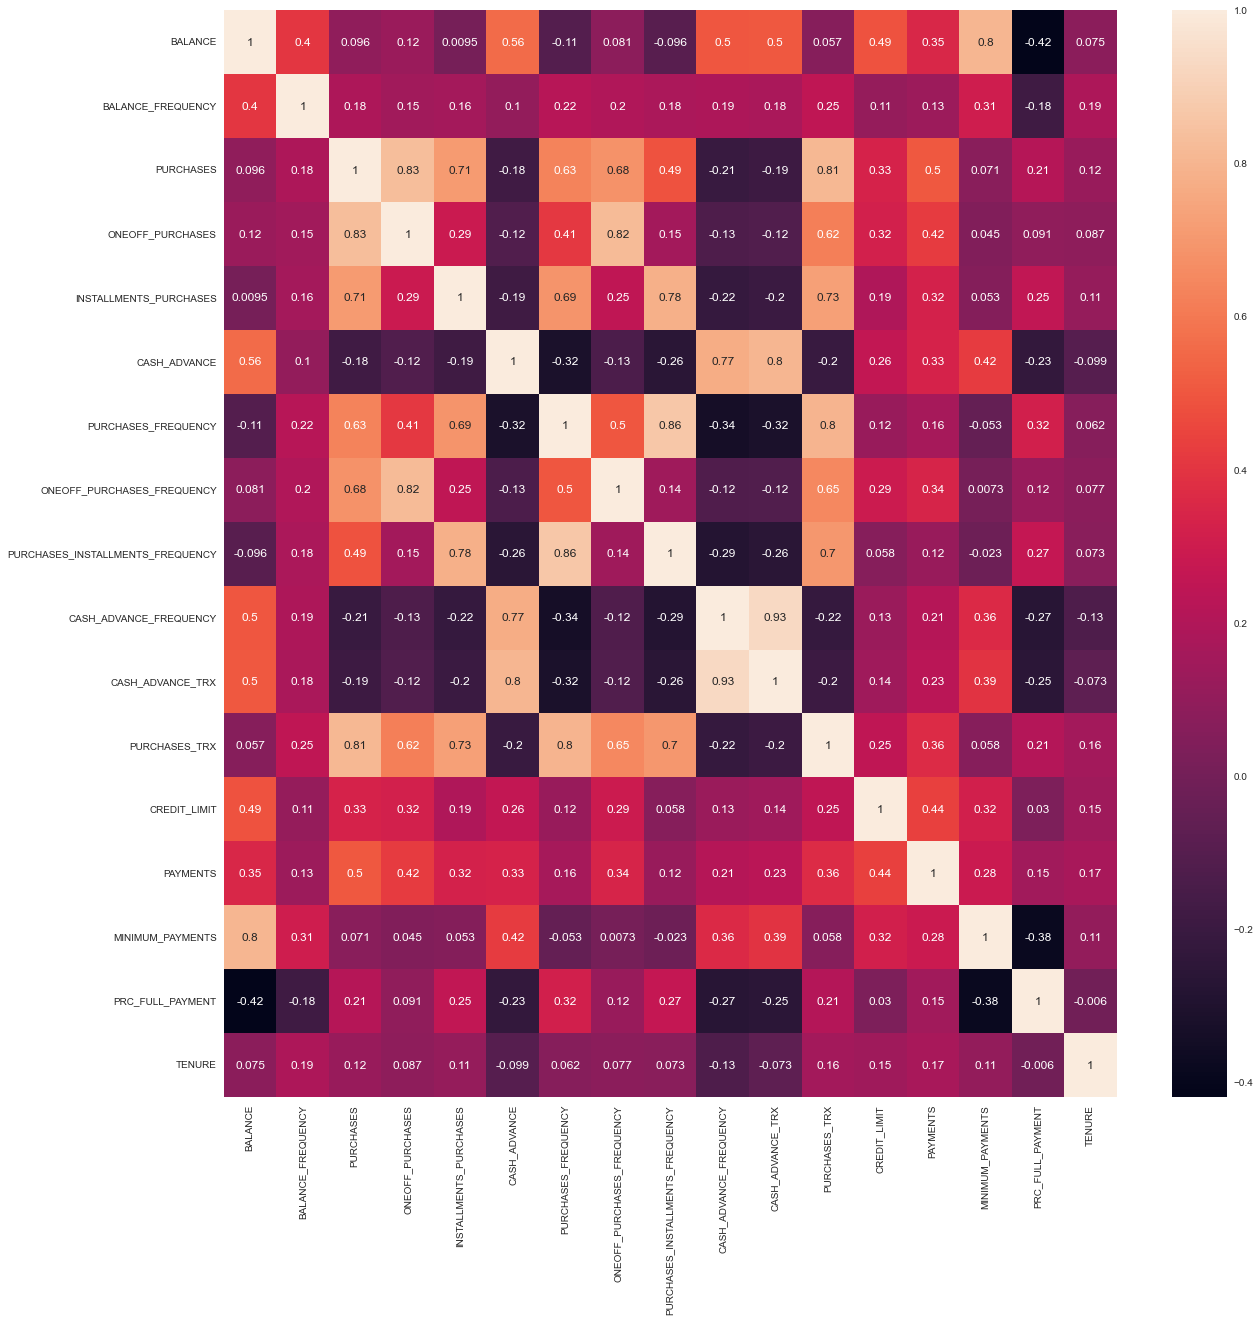

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)

# Model Definition
---------------------------------------------
After doing data cleaning and data preprocessing, the data obtained will be used for the next model building. There are several variables that will be used to create a Cluster of Credit Card. The test **method that will be used in this project is K-Means Clustering and PCA method**. 

### K-Means Clustering
----------------------------
K-Means Clustering technique tries to minimize the distance of the points in a cluster with their centroid. The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.
1. Choose the number of clusters k
2. Select k random points from the data as centroids
3. Assign all the points to the closest cluster centroid
4. Recompute the centroids of newly formed clusters
5. Repeat steps 3 and 4

Stopping Criteria for K-Means Clustering:
1. Centroids of newly formed clusters do not change
2. Points remain in the same cluster
3. Maximum number of iterations are reached

Since K-Means is a distance-based algorithm, this difference in magnitude can cause problems. So it is necessary to standardize

### PCA
--------------------------------
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be used to extract information from a high-dimensional space by projecting it into a lower-dimensional sub-space. PCA tries to retain important parts that have more data variation and remove unimportant parts with less variation.

We'll use the sklearn library to import the PCA module, and in the PCA method, we'll pass in the number of components and finally call fit_transform on the aggregated data. Because the PCA output is affected based on the scale of the data features, it needs to be standardized first

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, we can group similar data points based on the feature correlations between them without supervision (or labels).

# Model Building 

## Normalizing

In [16]:
scaler = StandardScaler()
df_new = scaler.fit_transform(df_new)

In [17]:
power = PowerTransformer()
df_new = power.fit_transform(df_new)

## K-Means

Find the n_clusters parameter

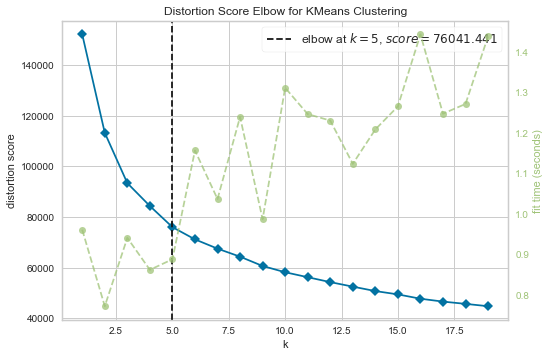

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
model = KMeans(random_state=42)
visual= KElbowVisualizer(model, k=(1,20))

visual.fit(df_new)       
visual.show() 

1. It can be seen that the optimal n value is 5
2. Next we use the value n = 5 as a prediction

In [19]:
kmeans = KMeans(n_clusters=5, max_iter = 300, random_state=42, init ='k-means++')
model_km = kmeans.fit(df_new)
y_pred = kmeans.predict(df_new)
labels=kmeans.labels_
y_pred

array([1, 2, 3, ..., 0, 1, 1])

In [20]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.0000,0.00,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.1700,0.00,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.722223,1499.00,1443.5125,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.0000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.0000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.357143,6,0
8946,19.183215,1.000000,300.00,0.0000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.0000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.0000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [21]:
clusters['cluster'].value_counts()

2    2467
0    1860
1    1776
3    1679
4    1168
Name: cluster, dtype: int64

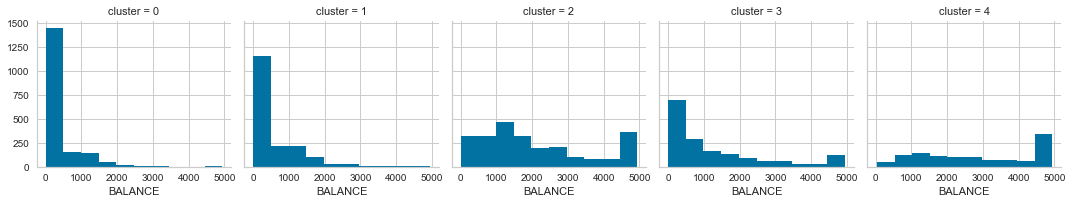

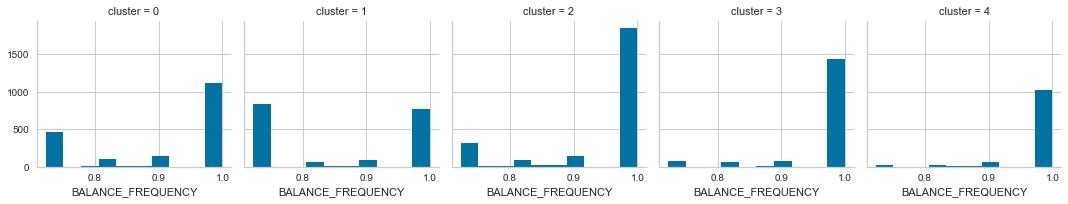

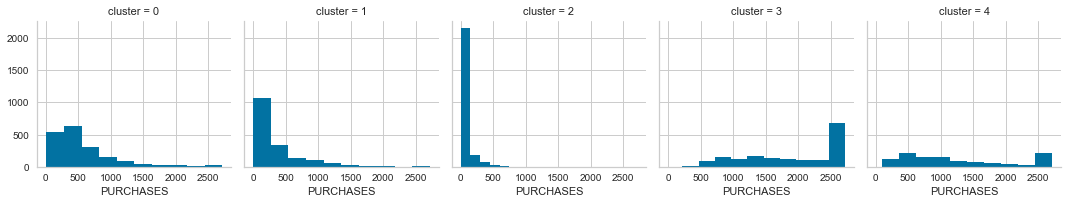

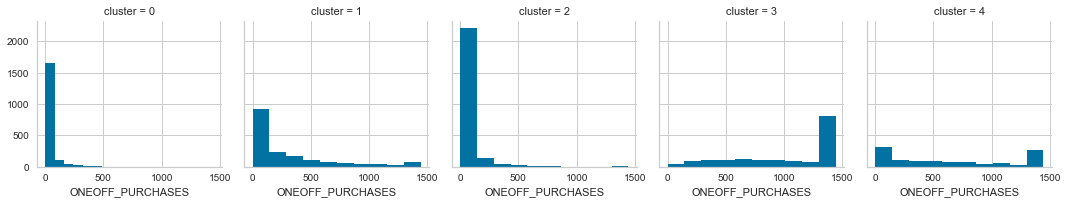

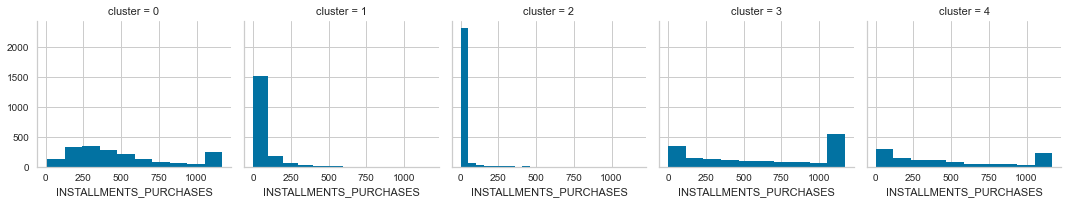

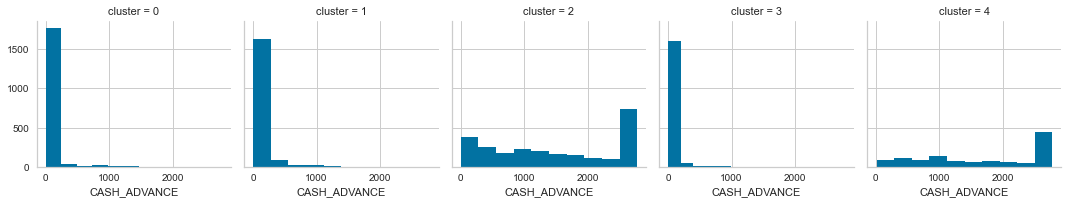

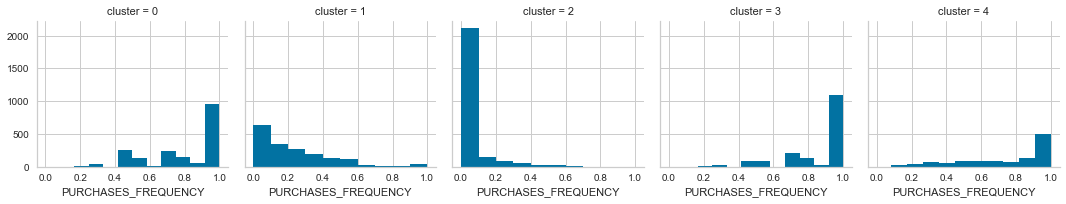

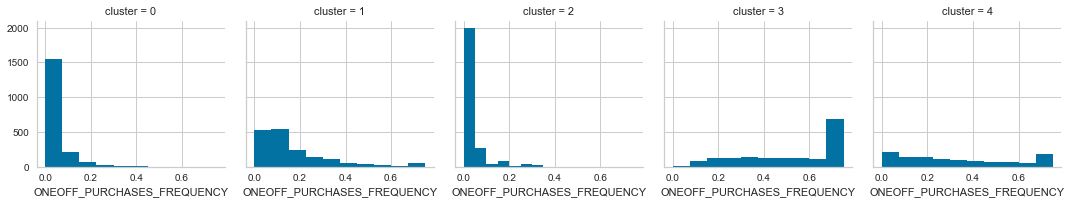

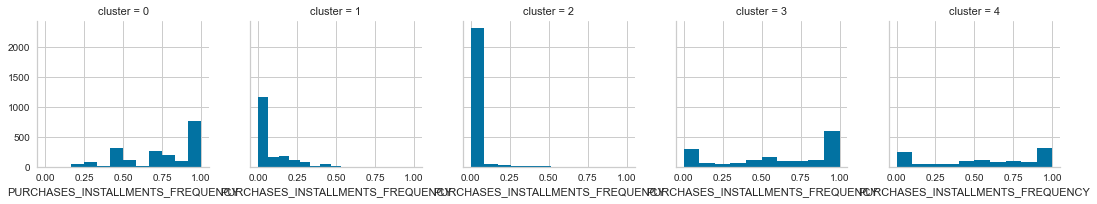

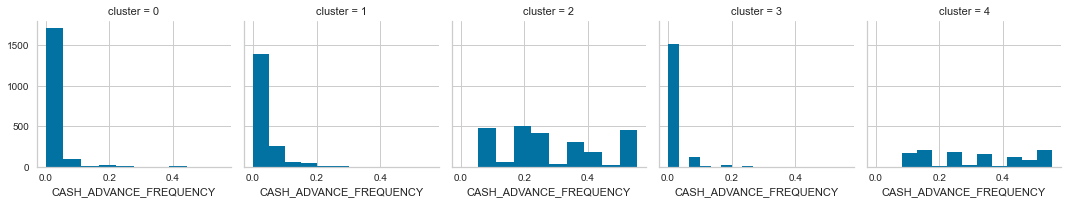

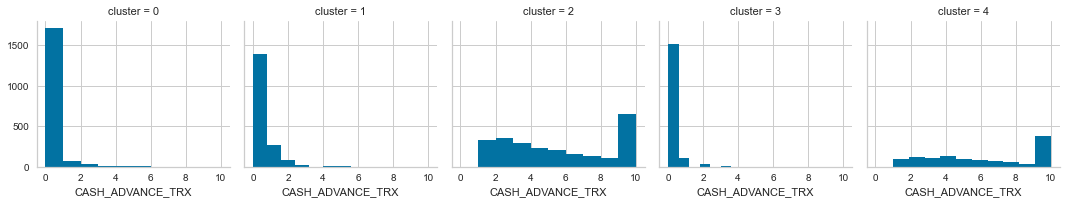

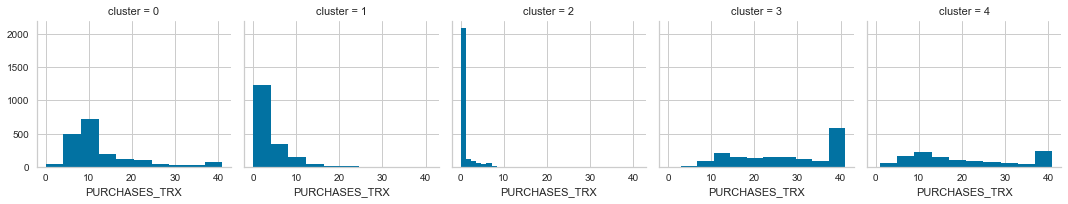

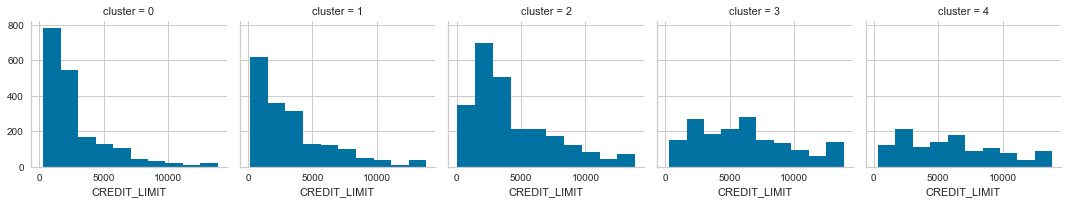

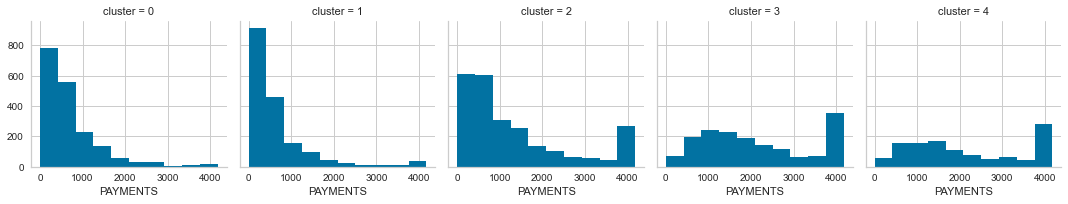

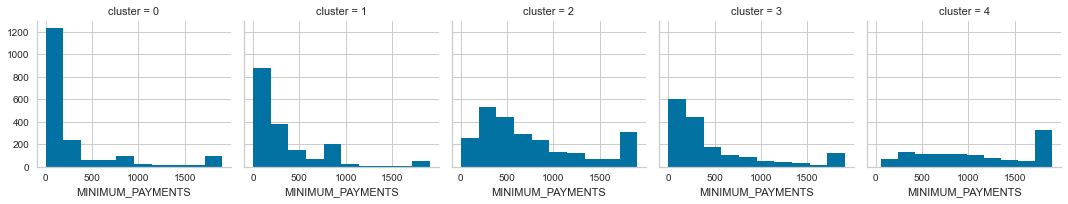

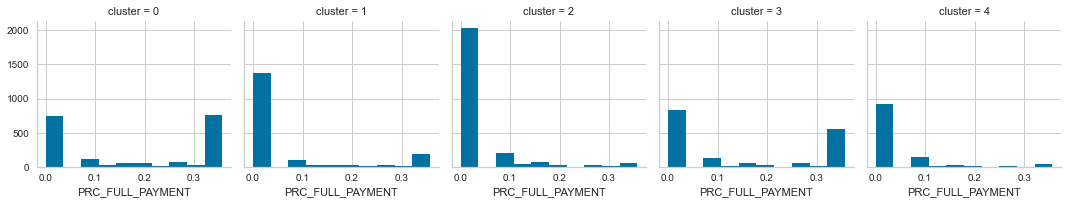

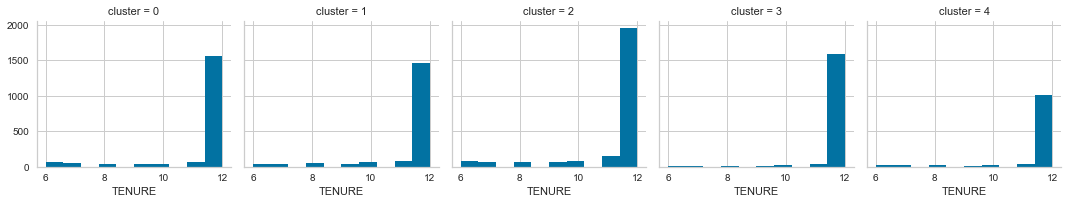

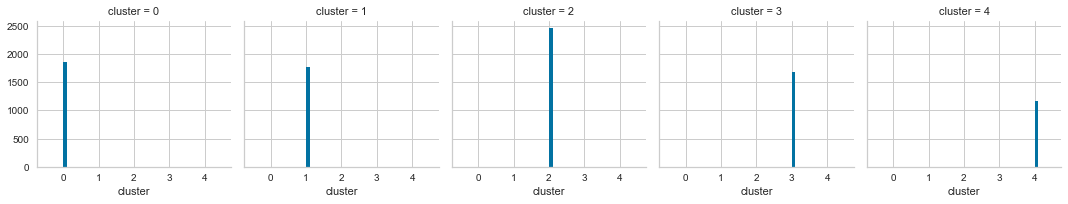

In [22]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

## PCA

In [23]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(df_new)

In [24]:
pca= pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca

,pca1,pca2
0,-1.000132,-3.367865
1,-3.181216,1.439758
2,1.348800,1.129123
3,-0.944832,0.279009
4,-1.345645,-1.866441
...,...,...
8945,1.326566,-3.002075
8946,0.688526,-1.844591
8947,0.572691,-3.796559
8948,-2.400320,-3.561600


In [25]:
pca_new = pd.concat([pca,pd.DataFrame({'cluster':labels})], axis = 1)
pca_new

,pca1,pca2,cluster
0,-1.000132,-3.367865,1
1,-3.181216,1.439758,2
2,1.348800,1.129123,3
3,-0.944832,0.279009,1
4,-1.345645,-1.866441,1
...,...,...,...
8945,1.326566,-3.002075,0
8946,0.688526,-1.844591,0
8947,0.572691,-3.796559,0
8948,-2.400320,-3.561600,1


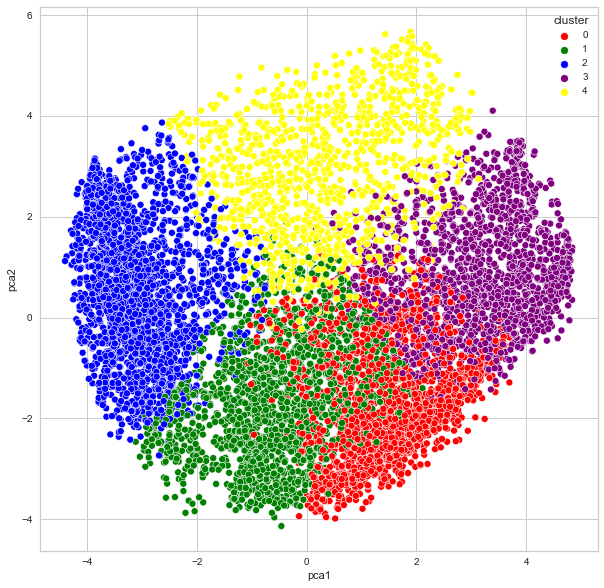

In [26]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_new, palette =['red','green','blue','purple','yellow'])
plt.show()

it can be seen that the visualization is still not good, so we change the n_cluster value

PCA componen = 3

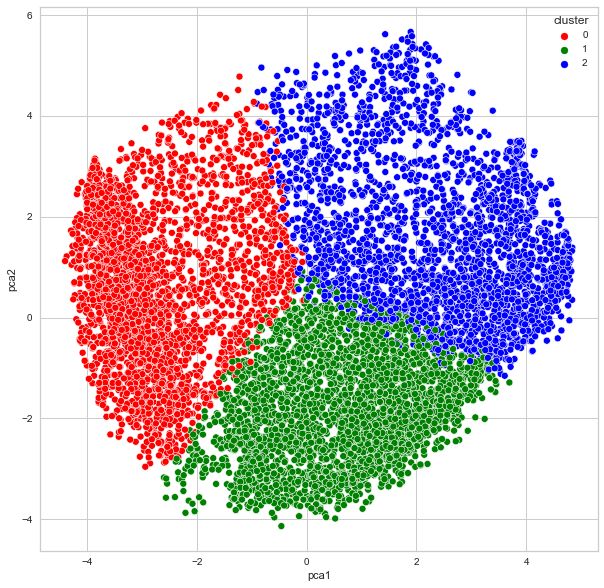

In [27]:
kmeans = KMeans(n_clusters=3, max_iter = 300, random_state=42, init ='k-means++')
kmeans.fit(df_new)
y_pred = kmeans.predict(df_new)
labels=kmeans.labels_

clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)

pca=PCA(n_components=2)
principal_comp=pca.fit_transform(df_new)

pca= pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])

pca_new = pd.concat([pca, pd.DataFrame({'cluster':labels})], axis = 1)

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_new, palette =['red','green','blue'])
plt.show()

Now clustering has been divided into good

# Exploratory Data Analysis (EDA)

## Plotting Cluster

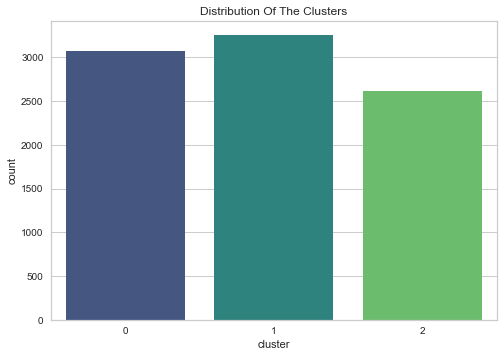

In [28]:
#Plotting countplot of clusters

pl = sns.countplot(x = clusters["cluster"], palette='viridis')
pl.set_title("Distribution Of The Clusters")
plt.show()

In [29]:
clusters['cluster'].value_counts()

1    3254
0    3077
2    2619
Name: cluster, dtype: int64

**Market segmentation :**

- Quite a Lot of Users [0]
- Most Users [1]
- Least Users [2]

In [30]:
eval_df = clusters.replace({
    'cluster': {
        0: 'Quite a Lot of Users',
        1: 'Most Users',
        2: 'Least Users',
        }
})
eval_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Most Users
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Quite a Lot of Users
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Least Users
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,Quite a Lot of Users
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Most Users


## Feature Importance

Knowing what features have a big influence on the targets we predict in modeling is a must, with this information can make us better at analyzing and become more understanding of the data itself. Knowledge of important features in the data will also help us choose the most appropriate features selection to use in modelling later.

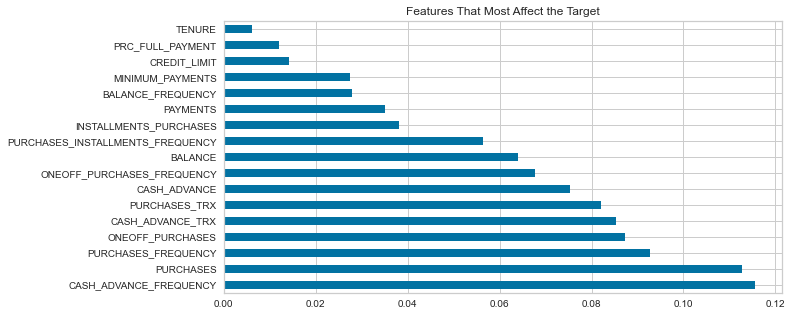

In [31]:
X = eval_df.drop(['cluster'], axis=1)
y = eval_df['cluster']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

#plot the graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Features That Most Affect the Target")

plt.show()

## Purchases

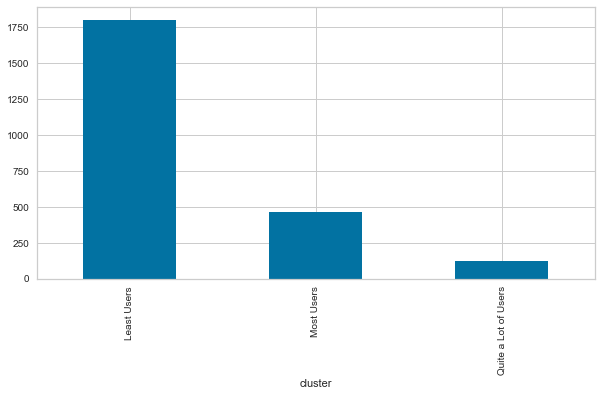

In [32]:
eval_df.groupby('cluster')['PURCHASES'].mean().plot(kind='bar', figsize=(10,5))
plt.show()

In [33]:
pd.DataFrame(eval_df.groupby('cluster')['PURCHASES'].mean())

,PURCHASES
cluster,
Least Users,1802.200378
Most Users,464.589222
Quite a Lot of Users,118.865902


In [34]:
pd.DataFrame(eval_df.groupby('cluster')['PURCHASES'].sum())

,PURCHASES
cluster,
Least Users,4719962.79
Most Users,1511773.33
Quite a Lot of Users,365750.38


## Frequency of Cash Advance and Purchases

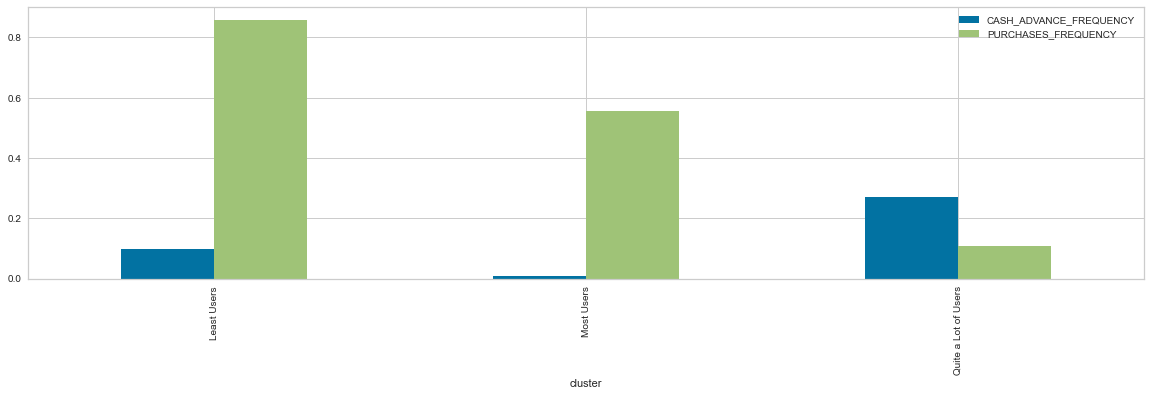

In [35]:
eval_df.groupby('cluster')['CASH_ADVANCE_FREQUENCY', 'PURCHASES_FREQUENCY'].mean().plot(kind='bar', figsize=(20,5))
plt.show()

In [36]:
eval_df.groupby('cluster')['CASH_ADVANCE_FREQUENCY', 'PURCHASES_FREQUENCY'].mean()

,CASH_ADVANCE_FREQUENCY,PURCHASES_FREQUENCY
cluster,,
Least Users,0.099440,0.858798
Most Users,0.009916,0.556531
Quite a Lot of Users,0.271546,0.106758


## Purchases Transaction and Oneoff Purchases

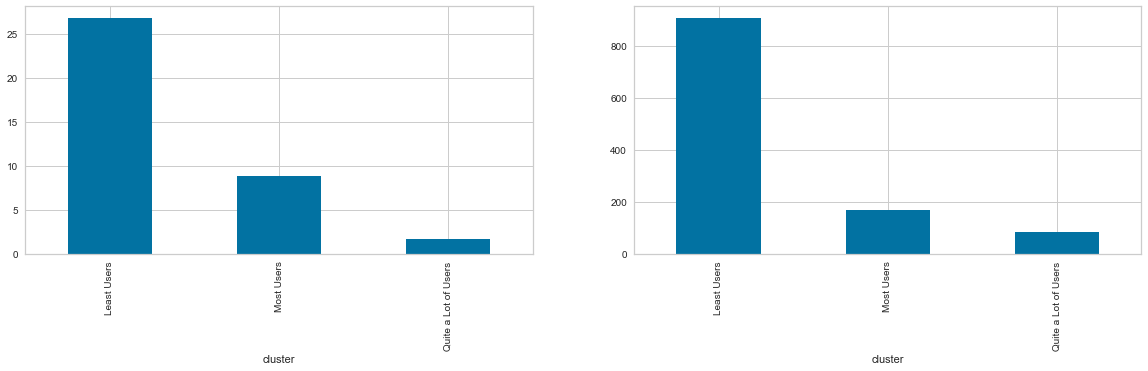

In [37]:
ax = plt.subplot(2,2,1)
eval_df.groupby('cluster')['PURCHASES_TRX'].mean().plot(kind='bar', figsize=(20,10) ,ax=ax)
ax = plt.subplot(2,2,2)
eval_df.groupby('cluster')['ONEOFF_PURCHASES'].mean().plot(kind='bar', figsize=(20,10), ax=ax)
plt.show()

## Cash Advance and Balance Analysis

`Notes :`

- **Cash advance** means cash withdrawal. Well! Cash advance uses cash withdrawn from a credit card that is not actually your money. So you have to make payments just like a purchase using a credit card. The difference is that what you buy from the cash advance feature is cash, not goods or services
- **Balance** is the amount of balance remaining and stored in a person's credit card account.

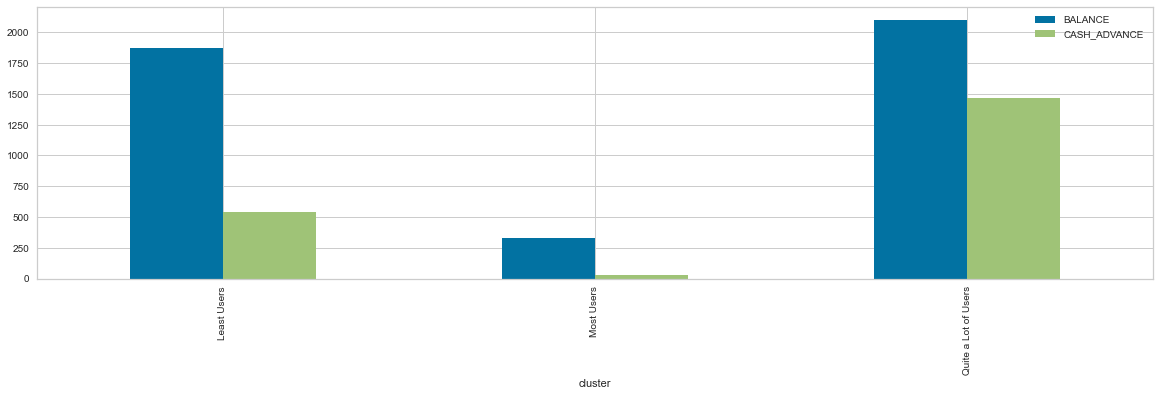

In [38]:
eval_df.groupby('cluster')['BALANCE', 'CASH_ADVANCE'].mean().plot(kind='bar', figsize=(20,5))
plt.show()

In [39]:
eval_df.groupby('cluster')['BALANCE', 'CASH_ADVANCE'].mean()

,BALANCE,CASH_ADVANCE
cluster,,
Least Users,1874.738278,542.928611
Most Users,328.679849,28.744159
Quite a Lot of Users,2101.264717,1463.481752


In [40]:
eval_df.groupby('cluster')['BALANCE', 'CASH_ADVANCE'].min()

,BALANCE,CASH_ADVANCE
cluster,,
Least Users,2.299436,0.0
Most Users,0.000000,0.0
Quite a Lot of Users,0.000000,0.0


In [41]:
eval_df.groupby('cluster')['BALANCE', 'CASH_ADVANCE'].max()

,BALANCE,CASH_ADVANCE
cluster,,
Least Users,4942.927215,2784.552848
Most Users,4942.927215,2452.136461
Quite a Lot of Users,4942.927215,2784.552848


## Cash Advance and Minimum Payments

- **CASH_ADVANCE_FREQUENCY**, How often cash in advance is paid
- **CASH_ADVANCE_TRX**, Transaction Amount made with "Cash in Advance"
- **MINIMUM_PAYMENTS**, The minimum amount of payment made by the user

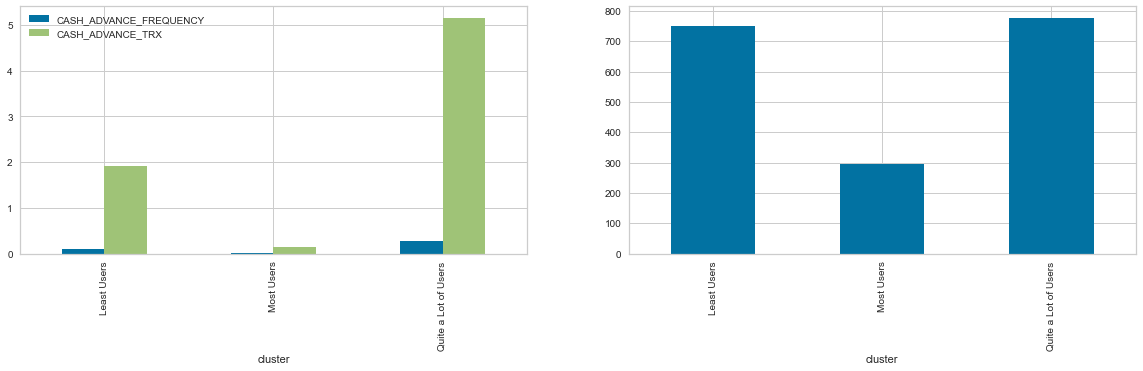

In [42]:
ax = plt.subplot(2,2,1)
eval_df.groupby('cluster')['CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX'].mean().plot(kind='bar', figsize=(20,10) ,ax=ax)
ax = plt.subplot(2,2,2)
eval_df.groupby('cluster')['MINIMUM_PAYMENTS'].mean().plot(kind='bar', figsize=(20,10), ax=ax)
plt.show()

In [43]:
eval_df.groupby('cluster')['MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX'].mean()

,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX
cluster,,
Least Users,750.637739,1.922108
Most Users,295.281450,0.139828
Quite a Lot of Users,775.740197,5.147871


In [44]:
eval_df.groupby('cluster')['MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX'].min()

,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX
cluster,,
Least Users,3.197940,0
Most Users,0.019163,0
Quite a Lot of Users,1.334075,0


In [45]:
eval_df.groupby('cluster')['MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX'].max()

,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX
cluster,,
Least Users,1904.229874,10
Most Users,1904.229874,10
Quite a Lot of Users,1904.229874,10


# Deployment

In [46]:
pickle.dump(scaler, open('scaler_model.pkl','wb'))
pickle.dump(model_km, open('model_km.pkl','wb'))
pickle.dump(principal_comp, open('model_pca.pkl','wb'))

# Marketing Strategy Summary

Based on the clustering that we have done on credit card user data, **3 groups** of credit card users are divided based on their usage behavior, namely the **Most Users, Quite a Lot of Users, and the Fewest Users**. To position our business as an affordable option for local consumers, we plan to focus on middle-class consumers (Most Users and Quite a Lot of Users).

**Market segment criteria:**

- How often do users make product purchases?
- How often do users make cash withdrawals?
- What is the average amount of remaining user balance?
- What is the average amount of cash withdrawals a user makes?
- What is the minimum average amount of payment a user makes?

### Most Users

Customer Share : 36.3%

Average Expenses/Purchases : $464.59 per month

Main characteristics :

- Purchases Frequence/Shopping habits : Sometimes.

- It is very rare to make cash withdrawals.

- The average remaining balance in his account is $328.68 per month.

- The average cash withdrawal made is $28.7 per month.

- The average number of transactions with cash withdrawals is 1 transactions per month.

- The minimum average payment made is $295.28 per month.

### Quite a Lot of Users

Customer Share : 34.3%

Average Expenses/Purchases : $118.86 per month

Main characteristics :

- Purchases Frequence/Shopping habits : Rarely.

- Quite often make cash withdrawals.

- The average remaining balance in his account is $2101.26 per month.

- The average cash withdrawal made is $1463.48 per month.

- The average number of transactions with cash withdrawals is 5 transactions per month.

- The minimum average payment made is $775.74 per month.

### Least Users

Customer Share : 29.3%

Average Expenses/Purchases : $1802.20 per month

Main characteristics :

- Purchases Frequence/Shopping habits: Often.

- Sometimes make cash withdrawals.

- The average remaining balance in his account is $1874.74 per month.

- The average cash withdrawal made is $542.93 per month.

- The average number of transactions with cash withdrawals is 2 transactions per month.

- The minimum average payment made is $750.64 per month.